# Business Context
X Education sells online courses to industry professionals
X Education gets leads via various channels,
We need to increase the efficiancy of leads conversion by identifying potential candiates via logistic regression

Using the data provide create a logistic model to identify Hot Leads and Lead score


# Goal
## Identify hot leads
To make this process more efficient, the company wishes to identify the 
most potential leads, also known as ‘Hot Leads’

## Identify lead score
The company requires you to build a model wherein you need to assign a 
lead score to each of the leads such that the customers with a higher lead 
score have a higher conversion chance and the customers with a 
lower lead score have a lower conversion chance
upgrad-multiple-linear-assignment-2

## Library Installation 

In [227]:
!pip install  numpy
!pip install  pandas
!pip install  matplotlib
!pip install  seaborn
!pip install  sklearn
!pip install  statsmodels

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
sns.set_theme()

# Data analysis
from sklearn.preprocessing import PowerTransformer

# model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm


# model evaluation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve


## ignore notebook warnings

In [3]:
import warnings
warnings.filterwarnings("ignore")

## notebook config setup

In [4]:
pd.set_option('float_format', '{:.2f}'.format)

In [5]:
csv_path = '/home/ec2-user/SageMaker/src/archive/bharath_analysis_ref/lead-scoring-case-study/'
leads_raw_df = pd.read_csv(csv_path+"Leads.csv")

In [6]:
# Check the head of the dataset
leads_raw_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


# Functions

### box_plot

In [7]:
def box_plot(df,x,y):
    sns.set_style(style="whitegrid")
    sns.boxplot(data=df, x=x, y=y)
    sns.set_style('darkgrid')
    sns.set_palette('Set2')
    plt.title(f'{x} vs {y}')
    plt.xlabel(f'{x}')
    plt.ylabel(f'----> {y}')
    plt.show()

### top_ten_percentage_distribution

In [8]:
def top_ten_percentage_distribution(dataframe, column_name):
    # Get value counts for the specified column
    value_counts = dataframe[column_name].value_counts()

    # Calculate percentages
    percentages = (value_counts / len(dataframe)) * 100

    # Get the top ten percentage distribution
    top_ten_distribution = percentages.head(10)
    ax = sns.barplot(x=top_ten_distribution.index, y=top_ten_distribution.values, color='skyblue')
    ax.bar_label(ax.containers[0])
    plt.xlabel('Category')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage')
    plt.title('Top Ten Percentage Distribution')
    plt.show()

# Analysis of presence of Select in the dataset
### Note: The possible reason for select being present is , 
### it might be a dropdown in web page selection, 
### and the field might be optional so many user's might have left it unanswered

In [9]:
leads_raw_df.apply(lambda row: row.astype(str).str.contains('Select').any(), axis=1).sum()

6025

In [10]:
leads_raw_df.apply(lambda row: row.astype(str).str.contains('select').any(), axis=1).sum()

0

In [11]:
leads_raw_df.apply(lambda row: row.astype(str).str.contains('SELECT').any(), axis=1).sum()

0

Clearly only one variant of 'Select' is alone is present, we need to replace 'Select' with None in the corresponding columns

In [12]:
for i in leads_raw_df.columns:
    if leads_raw_df[i].dtype=='O':
        if leads_raw_df[i].str.contains('Select').any():
            print(f'Column "{i}" has Select as value')
            leads_raw_df[i].replace(to_replace='Select', value=None, inplace=True)
            print(f'Column "{i}" replacement of Select to value is completed')

Column "Specialization" has Select as value
Column "Specialization" replacement of Select to value is completed
Column "How did you hear about X Education" has Select as value
Column "How did you hear about X Education" replacement of Select to value is completed
Column "Lead Profile" has Select as value
Column "Lead Profile" replacement of Select to value is completed
Column "City" has Select as value
Column "City" replacement of Select to value is completed


# ETA Analysis - Basic Analysis

## Get basic info on current application along null values

In [13]:
leads_raw_df.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Basic Info observation 
there are around 9240 row of data and 37 columns
starting from `Prospect ID` to `Last Notable Activity` all the row has values, beyond that there are null values present in all the columns data-type inference

### Analyzing datatypes of application attributes

(array([0, 1, 2]),
 [Text(0, 0, 'object'), Text(1, 0, 'float64'), Text(2, 0, 'int64')])

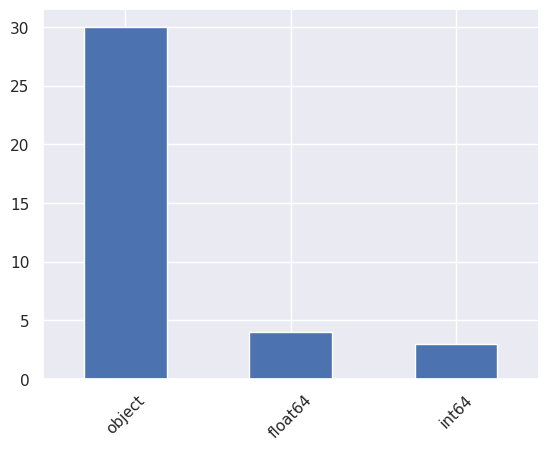

In [14]:
current_dtype_df = leads_raw_df.dtypes.apply(lambda x: x.name)
current_dtype_df.value_counts().plot.bar()
plt.xticks(rotation=45)

In [15]:
current_dtype_df.value_counts()

object     30
float64     4
int64       3
Name: count, dtype: int64

### Statistical info for numeric columns

In [16]:
# Since the `Prospect Id` and 'Lead Number' are only for identification, 
# These are not needed for our analysis, we can remove these columns
leads_raw_df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [17]:
leads_raw_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,0.39,3.45,487.70,2.36,14.31,16.34
std,0.49,4.85,548.02,2.16,1.39,1.81
min,0.00,0.00,0.00,0.00,7.00,11.00
25%,0.00,1.00,12.00,1.00,14.00,15.00
50%,0.00,3.00,248.00,2.00,14.00,16.00
75%,1.00,5.00,936.00,3.00,15.00,18.00
max,1.00,251.00,2272.00,55.00,18.00,20.00


Among the columns around 6 columns are numerical columns,

Here Converted corresponds to whether the user has joined or not

Most of the remaining columns are categegorical columns,

## Identify any columns which has incorrect data type

In [18]:
leads_raw_df.select_dtypes(include=["object"]).columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

After analysing the values of the above columns, all belongs to valid of string type (object)
##### Note: some of the columns have only few values like Yes and No

## Analysis of columns with missing values


In [19]:
leads_raw_df.columns[leads_raw_df.isnull().any()].shape

(17,)

### Around 17 columns have at least 1 value as null values, we need to dig deep to conclude whether these needs to be removed or imputed or left as it is

In [20]:
leads_raw_df.columns[leads_raw_df.isnull().any()].to_list()

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

### Identify necessary Rows & columns
* As part of any analysis it is very important to identify the right set of data that is need for analysis.
Identifying the right row and columns will make the analysis quicker and effective,
as we do not need to traverse through the entire data


* As first of analysis , since the loan provision is a financial metrics, we can focus on the financial data rather than identity columns like prospect id and Lead Number

## Missing values count % - Round 1

In [21]:
sum_of_null_each_columns = leads_raw_df.isnull().sum()
null_percentage = (sum_of_null_each_columns/leads_raw_df.shape[0])*100
null_percentage

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [22]:
null_percentage[null_percentage>40]

How did you hear about X Education   78.46
Lead Quality                         51.59
Lead Profile                         74.19
Asymmetrique Activity Index          45.65
Asymmetrique Profile Index           45.65
Asymmetrique Activity Score          45.65
Asymmetrique Profile Score           45.65
dtype: float64

In [23]:
leads_raw_df.drop(['How did you hear about X Education',
'Lead Quality',
'Lead Profile',
'Asymmetrique Activity Index',
'Asymmetrique Profile Index',
'Asymmetrique Activity Score',
'Asymmetrique Profile Score'], axis=1, inplace = True)

## Missing values count % - Round 2

In [24]:
sum_of_null_each_columns = leads_raw_df.isnull().sum()
null_percentage = (sum_of_null_each_columns/leads_raw_df.shape[0])*100
null_percentage

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [25]:
null_percentage[null_percentage>29]

Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Tags                                            36.29
City                                            39.71
dtype: float64

In [26]:
leads_raw_df.drop(['What matters most to you in choosing a course','Tags','City',], axis=1, inplace = True)
# Note: though Specialization and What is your current occupation has significance null values, as Subject Expert this is a major factor which determines the Hot Leads
# so we will not remove these columns

In [27]:
leads_raw_df['Country'].value_counts(normalize=True)

Country
India                  0.96
United States          0.01
United Arab Emirates   0.01
Singapore              0.00
Saudi Arabia           0.00
United Kingdom         0.00
Australia              0.00
Qatar                  0.00
Hong Kong              0.00
Bahrain                0.00
Oman                   0.00
France                 0.00
unknown                0.00
South Africa           0.00
Nigeria                0.00
Germany                0.00
Kuwait                 0.00
Canada                 0.00
Sweden                 0.00
China                  0.00
Asia/Pacific Region    0.00
Uganda                 0.00
Bangladesh             0.00
Italy                  0.00
Belgium                0.00
Netherlands            0.00
Ghana                  0.00
Philippines            0.00
Russia                 0.00
Switzerland            0.00
Vietnam                0.00
Denmark                0.00
Tanzania               0.00
Liberia                0.00
Malaysia               0.00
Kenya       

* Clearly India takes 96% of the distribution, hence the country doesn't have  significance, so the data is predominantly india, so the column might not have significant contribution compared to the sample size

In [28]:
leads_raw_df.drop(['Country'], axis=1, inplace = True)

In [29]:
leads_raw_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Missing values count % - In Depth
* Inorder to make a model we need to start with minimal columns which has high significane / correlation and variation interms of data presence in each column,
* lets analyse the column in depth

### Analysis of `Newspaper Article`

In [30]:
column_name = 'Newspaper Article'

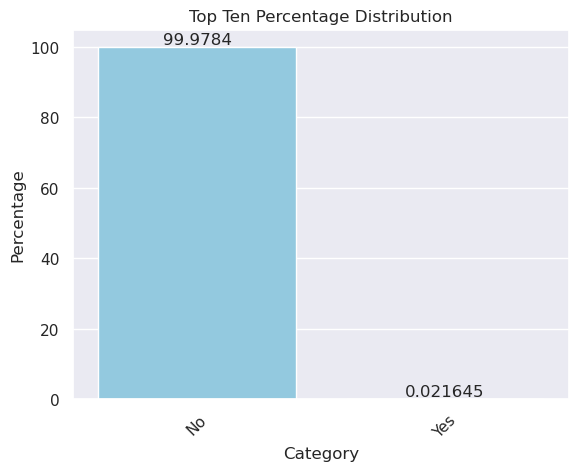

In [31]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* As the result is highly monotonus we can drop the column

In [32]:
leads_raw_df.drop(column_name, axis = 1, inplace = True)

### Analysis of `Do Not Call`

In [33]:
column_name = 'Do Not Call'

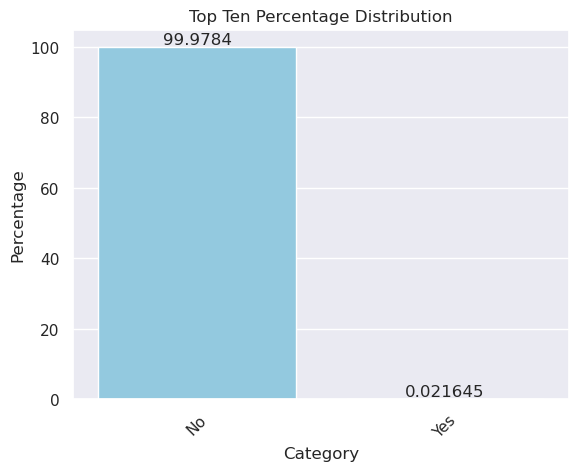

In [34]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* As the result is highly monotonus we can drop the column

In [35]:
leads_raw_df.drop(column_name, axis = 1, inplace = True)

### Analysis of `Search`

In [36]:
column_name = 'Search'

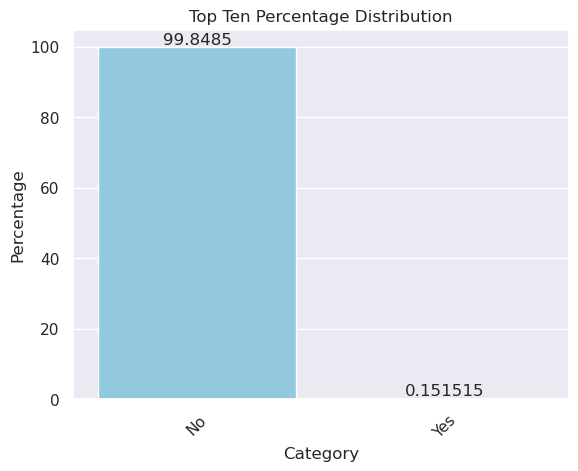

In [37]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* As the result is highly monotonus we can drop the column

In [38]:
leads_raw_df.drop(column_name, axis = 1, inplace = True)

### Analysis of `Magazine`

In [39]:
column_name = 'Magazine'

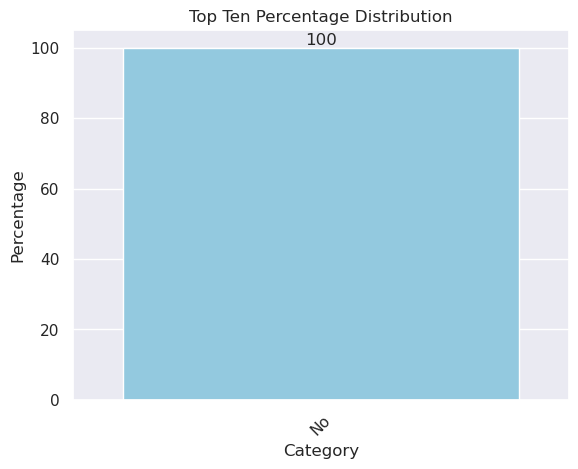

In [40]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* As the result is highly monotonus we can drop the column

In [41]:
leads_raw_df.drop(column_name, axis = 1, inplace = True)

### Analysis of `X Education Forums`

In [42]:
column_name = 'X Education Forums'

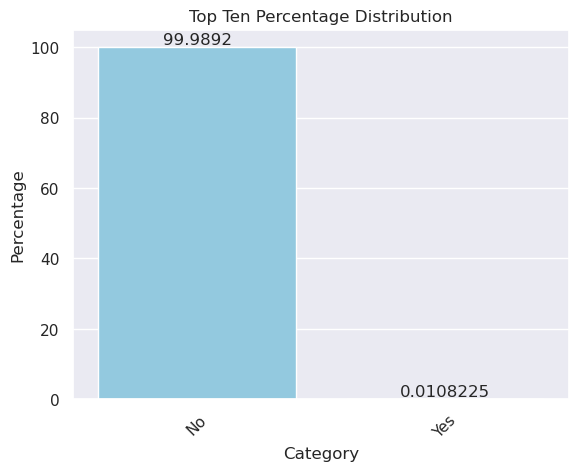

In [43]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* As the result is highly monotonus we can drop the column

In [44]:
leads_raw_df.drop(column_name, axis = 1, inplace = True)

### Analysis of `Newspaper`

In [45]:
column_name = 'Newspaper'

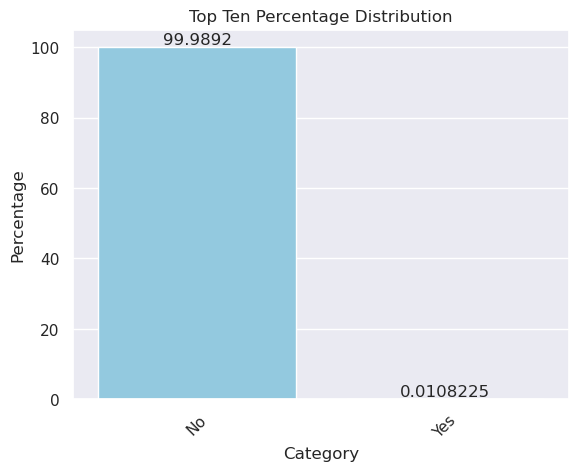

In [46]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* As the result is highly monotonus we can drop the column

In [47]:
leads_raw_df.drop(column_name, axis = 1, inplace = True)

### Analysis of `Digital Advertisement`

In [48]:
column_name = 'Digital Advertisement'

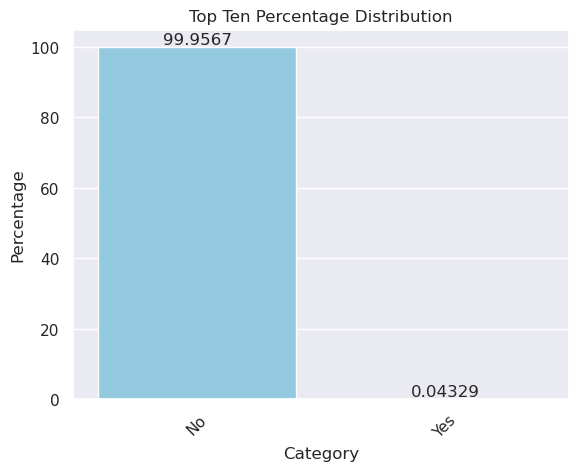

In [49]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* As the result is highly monotonus we can drop the column

In [50]:
leads_raw_df.drop(column_name, axis = 1, inplace = True)

### Analysis of `Through Recommendations`

In [51]:
column_name = 'Through Recommendations'

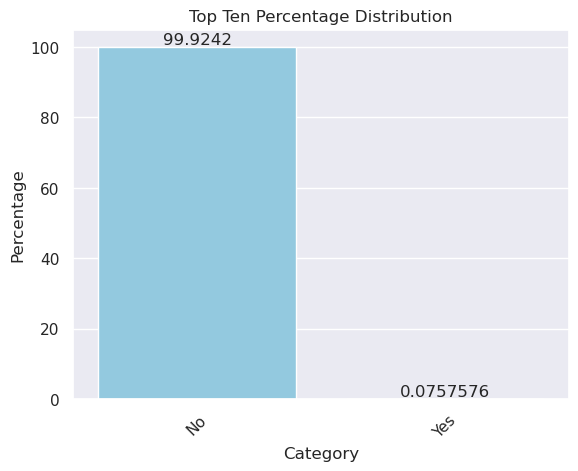

In [52]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* As the result is highly monotonus we can drop the column

In [53]:
leads_raw_df.drop(column_name, axis = 1, inplace = True)

### Analysis of `Receive More Updates About Our Courses`

In [54]:
column_name = 'Receive More Updates About Our Courses'

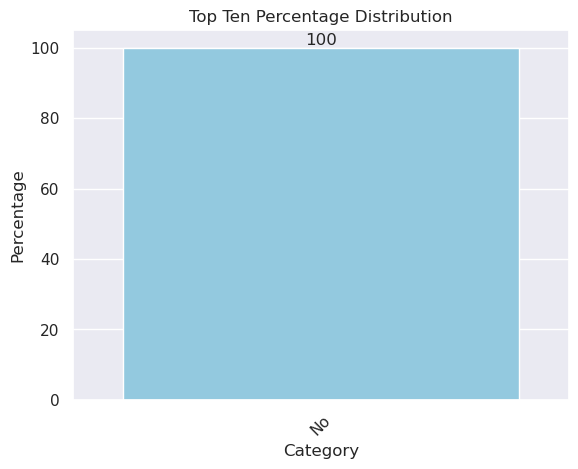

In [55]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* As the result is highly monotonus we can drop the column

In [56]:
leads_raw_df.drop(column_name, axis = 1, inplace = True)

### Analysis of `Update me on Supply Chain Content`

In [57]:
column_name = 'Update me on Supply Chain Content'

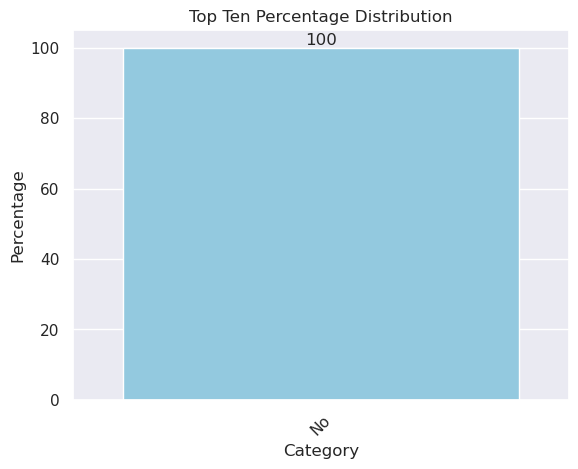

In [58]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* As the result is highly monotonus we can drop the column

In [59]:
leads_raw_df.drop(column_name, axis = 1, inplace = True)

### Analysis of `Get updates on DM Content`

In [60]:
column_name = 'Get updates on DM Content'

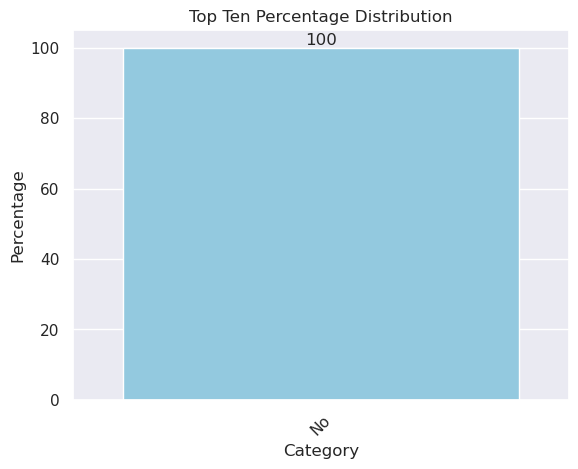

In [61]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* As the result is highly monotonus we can drop the column

In [62]:
leads_raw_df.drop(column_name, axis = 1, inplace = True)

### Analysis of `I agree to pay the amount through cheque`

In [63]:
column_name = 'I agree to pay the amount through cheque'

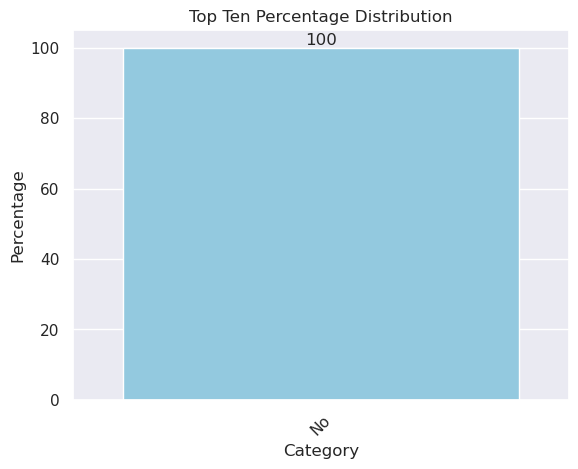

In [64]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* As the result is highly monotonus we can drop the column

In [65]:
leads_raw_df.drop(column_name, axis = 1, inplace = True)

### Analysis of `Lead Origin`

In [66]:
column_name = 'Lead Origin'

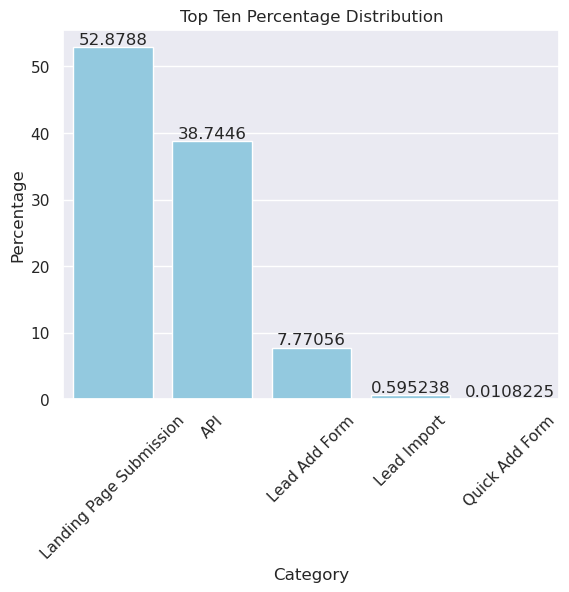

In [67]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* As the result is highly monotonus we can drop the column

### Analysis of `Lead Source`

In [68]:
column_name = 'Lead Source'

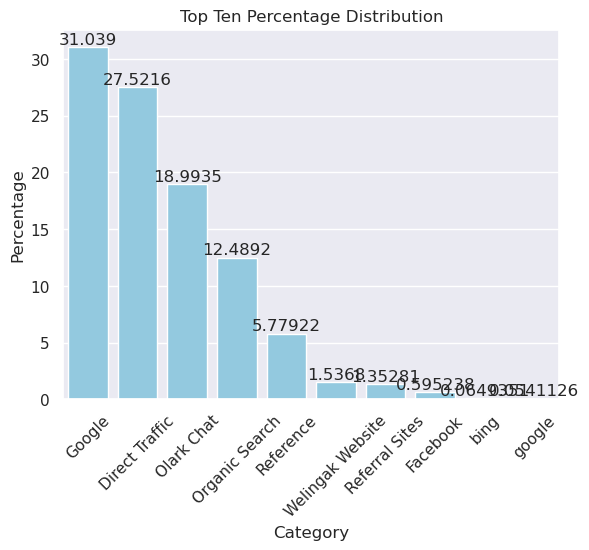

In [69]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* Distribution of data is variant, this will have significance can retain for now

### Analysis of `Do Not Email`

In [70]:
column_name = 'Do Not Email'

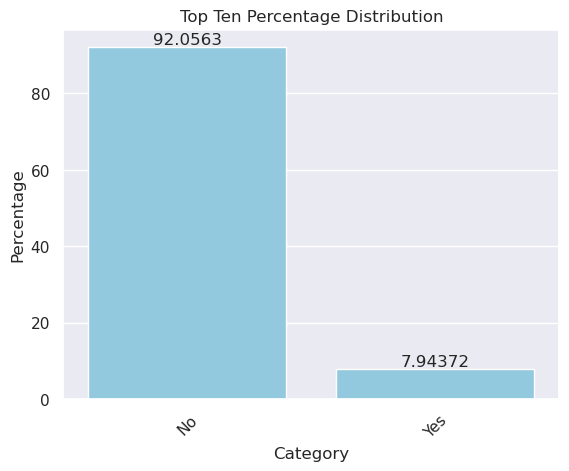

In [71]:
top_ten_percentage_distribution(leads_raw_df,column_name)

* Thought this field is not hight varient, let not remove any futerh columns as we have reduce the data columns to minimum

In [72]:
leads_raw_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [73]:
leads_raw_df.isnull().sum()
# spcialization select count: 1838

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            3380
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [74]:
leads_raw_df.isnull().sum()
# spcialization select count: 1838

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            3380
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [75]:
leads_raw_df.shape

(9240, 12)

In [76]:
# #checkpoint
# checkpoint - 0

## Removal of rows containing null values
* Now that we have removed all the unwanted columns,
* we can now remove the rows which has null values 

In [77]:
# Check the number of null values again

leads_raw_df.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            3380
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [78]:
leads_raw_df = leads_raw_df[~pd.isnull(leads_raw_df['What is your current occupation'])]

In [79]:
# Check the number of null values again

leads_raw_df.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                130
Total Time Spent on Website                  0
Page Views Per Visit                       130
Last Activity                              103
Specialization                            1947
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

* Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [80]:
# Drop the null value rows in the column 'TotalVisits'

leads_raw_df = leads_raw_df[~pd.isnull(leads_raw_df['TotalVisits'])]

In [81]:
# Check the null values again

leads_raw_df.isnull().sum()

Lead Origin                                  0
Lead Source                                 29
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1878
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [82]:
# Drop the null values rows in the column 'Lead Source'

leads_raw_df = leads_raw_df[~pd.isnull(leads_raw_df['Lead Source'])]

In [83]:
# Check the number of null values again

leads_raw_df.isnull().sum()

Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1856
What is your current occupation              0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [84]:
# Drop the null values rows in the column 'Specialization'

leads_raw_df = leads_raw_df[~pd.isnull(leads_raw_df['Specialization'])]

In [85]:
leads_raw_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
6,Landing Page Submission,Google,No,1,2.00,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,Landing Page Submission,Organic Search,No,1,8.00,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.00,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


In [86]:
leads_raw_df.shape

(4535, 12)

In [87]:
# #checkpoint
# checkpoint - 1

In [88]:
# since we have completed the data cleaning process completely, 
# we will take a copy leads_model_ref for all the model creation
leads_model_ref = leads_raw_df.copy()

In [89]:
# Confirm all the columns do not have any null values

leads_model_ref.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [90]:
print(leads_model_ref.shape)
print(leads_model_ref.shape[0]/9240) # intial total row count

(4535, 12)
0.4908008658008658


* We still have around 50% of the rows , thought this value is not great, this data has the accurate data and cleaned up

In [91]:
leads_model_ref.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,No,Modified
6,Landing Page Submission,Google,No,1,2.00,1640,2.00,Email Opened,Supply Chain Management,Unemployed,No,Modified
10,Landing Page Submission,Organic Search,No,1,8.00,1351,8.00,Email Opened,Travel and Tourism,Unemployed,Yes,Email Opened
11,Landing Page Submission,Direct Traffic,No,1,8.00,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,Yes,Page Visited on Website


In [92]:
# #checkpoint
# checkpoint - 2

# Prepare the data for modelling

## Analysis of Numeric columns correlation with Leads Converted

## TotalVisist analysis

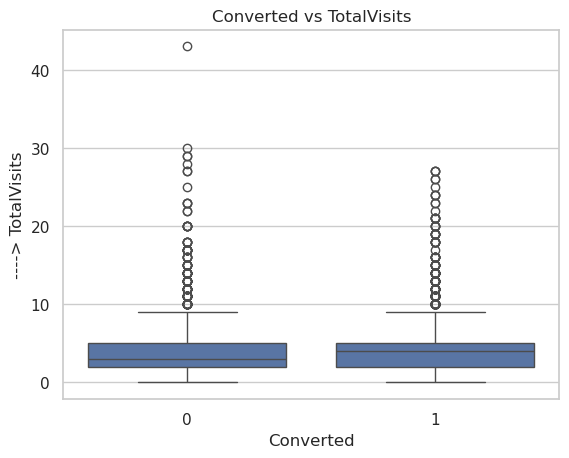

In [93]:
TotalVisits_df = leads_model_ref[leads_model_ref['TotalVisits']<=50]
box_plot(df=TotalVisits_df, x="Converted", y="TotalVisits")

#### `TotalVisist`
* No specific inference from the `TotalVisist`, as it is not guranteed the more the site visits the more people visitied will join,
* But the more the attraction will definetly have more footprints which can get converted to leads

## Total Time Spent on Website analysis

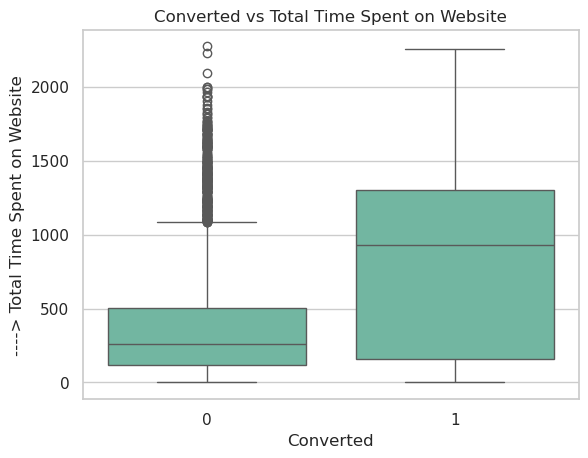

In [94]:
box_plot(df=TotalVisits_df, x="Converted", y="Total Time Spent on Website")

#### `Total Time Spent on Website`
* The more time spent definetly leads to the conversion directly evident from the graph

## Total Time Spent on Website analysis

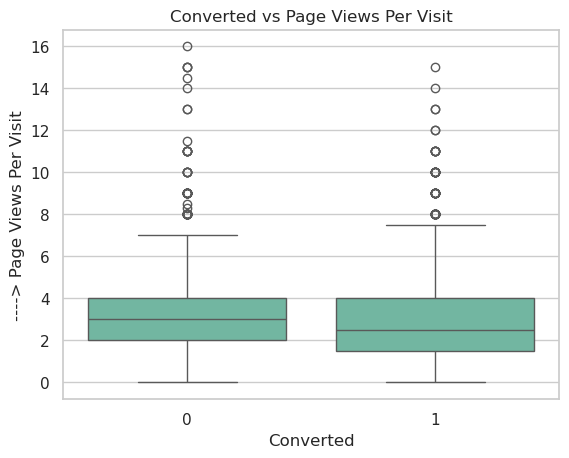

In [95]:
box_plot(df=TotalVisits_df, x="Converted", y="Page Views Per Visit")

#### `Page Views Per Visit`
* The more the pages a user vistis per visit the more chance the user can convert to leads

In [96]:
# #checkpoint
# checkpoint - 3

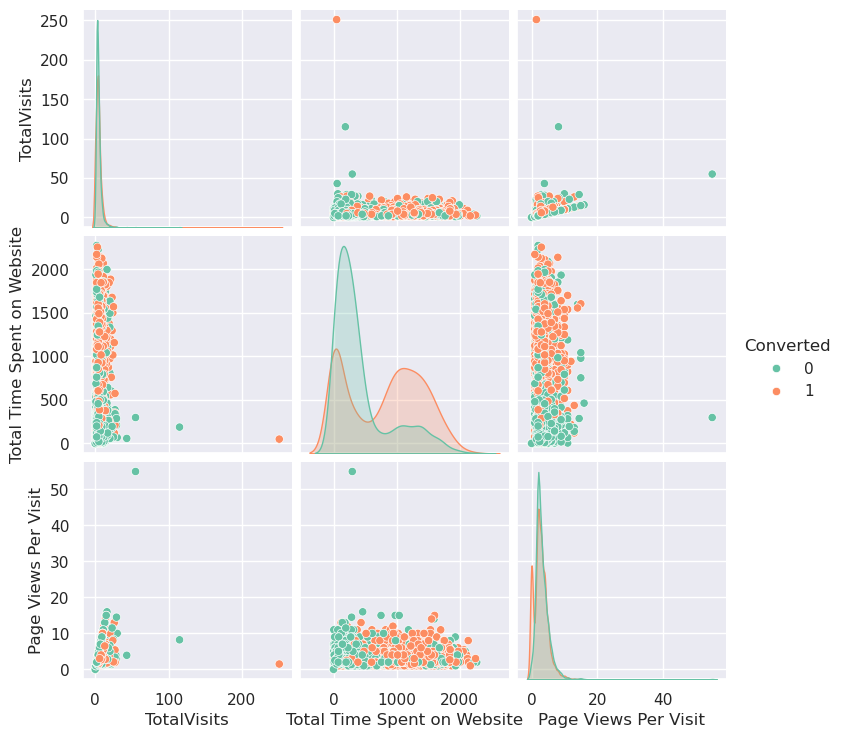

In [97]:
numerical_df = leads_model_ref[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(numerical_df,diag_kind='kde',hue='Converted')
plt.show()

## PowerTransformer
* PowerTransformer is a class in scikit-learn's preprocessing module that applies a power transformation to make the data more Gaussian-like. Gaussian-like distributions often have certain statistical properties that make them suitable for some machine learning algorithms.
* Normalizing Skewed Data: If your data is highly skewed, applying a power transformation can help normalize the distribution. Many statistical models assume normality, and transforming the data can improve the performance of such models.
* we will normalize three numerical columns and coorelate them with the conversion


In [98]:
pt = PowerTransformer()
transformed_numerical = pd.DataFrame(pt.fit_transform(numerical_df))
transformed_numerical.columns = numerical_df.columns
transformed_numerical.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-0.54,1.26,-0.33,0.98
1,-1.10,-0.19,-1.01,-1.02
2,-0.54,1.34,-0.33,0.98
3,1.13,1.12,2.03,0.98
4,1.13,1.11,0.04,0.98


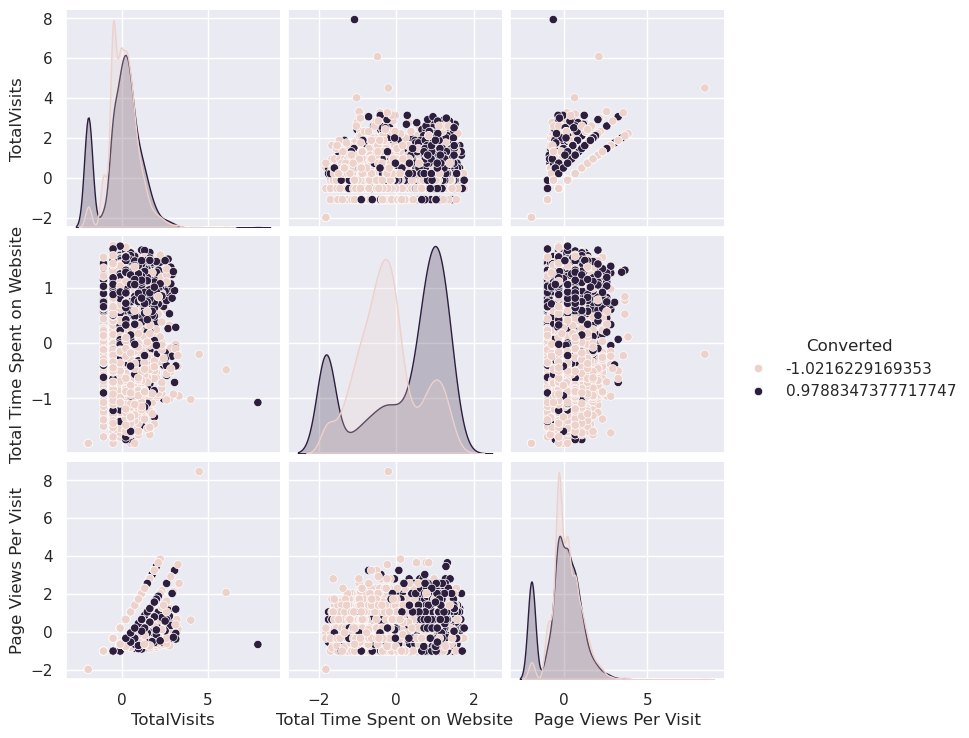

In [99]:
sns.pairplot(transformed_numerical,diag_kind='kde',hue='Converted')
plt.show()

### Creation of Dummy variables for all categorical columns 

* Other than the TotalVisits	, Total Time Spent on Website	, Page Views Per Visit we need to convert all the categorical columns

In [100]:
# Note the value in Specialization column is having value as `Banking, Investment And Insurance` 
# its better to remove the comma from the value 
leads_model_ref['Specialization'].replace(to_replace='Banking, Investment And Insurance', value='Banking Investment And Insurance', inplace=True)

In [101]:
categorical_columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity','Specialization']
dummy_variable_columns = pd.get_dummies(leads_model_ref[categorical_columns], drop_first=True)

# Add the results to the master dataframe
leads_model_ref = pd.concat([leads_model_ref, dummy_variable_columns], axis=1)

In [102]:
leads_model_ref.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,...,False,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,...,False,False,False,True,False,False,False,False,False,False
6,Landing Page Submission,Google,No,1,2.00,1640,2.00,Email Opened,Supply Chain Management,Unemployed,...,False,False,False,False,False,False,False,False,True,False
10,Landing Page Submission,Organic Search,No,1,8.00,1351,8.00,Email Opened,Travel and Tourism,Unemployed,...,False,False,False,False,False,False,False,False,False,True
11,Landing Page Submission,Direct Traffic,No,1,8.00,1343,2.67,Page Visited on Website,Human Resource Management,Unemployed,...,False,False,False,False,False,False,False,False,False,False


In [103]:
leads_model_ref.shape

(4535, 81)

### Deletion / Drop of categorical columns after create the dummay columns

In [104]:
leads_model_ref = leads_model_ref.drop(categorical_columns, axis=1)

In [105]:
print(leads_model_ref.shape)

(4535, 73)


In [106]:
# #checkpoint
# checkpoint - 4

In [107]:
leads_model_build_ref = leads_model_ref.copy()

# Model Building

## Test-Train Split

* The next step is to split the dataset into training an testing sets.

In [108]:
#extracting Affecting Attributes and Result

X = leads_model_build_ref.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2,2.00,1532,2.00,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.00,305,1.00,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
6,2.00,1640,2.00,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
10,8.00,1351,8.00,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11,8.00,1343,2.67,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [109]:
y = leads_model_build_ref['Converted']
y.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [110]:
# regular split of 70% train data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [111]:
# #checkpoint
# checkpoint - 5

### Scaling

* Scale the numeric value so that the numeric columns are of the same standard
* The goal is to ensure that all features contribute equally to the computation of distances, coefficients, and other mathematical operations within machine learning algorithms.

In [112]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2006,0.06,0.12,0.13,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
5140,0.02,0.01,0.03,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7588,0.02,0.01,0.07,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5244,0.02,0.07,0.05,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8663,0.04,0.09,0.07,True,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False


### Correlations - Heamap

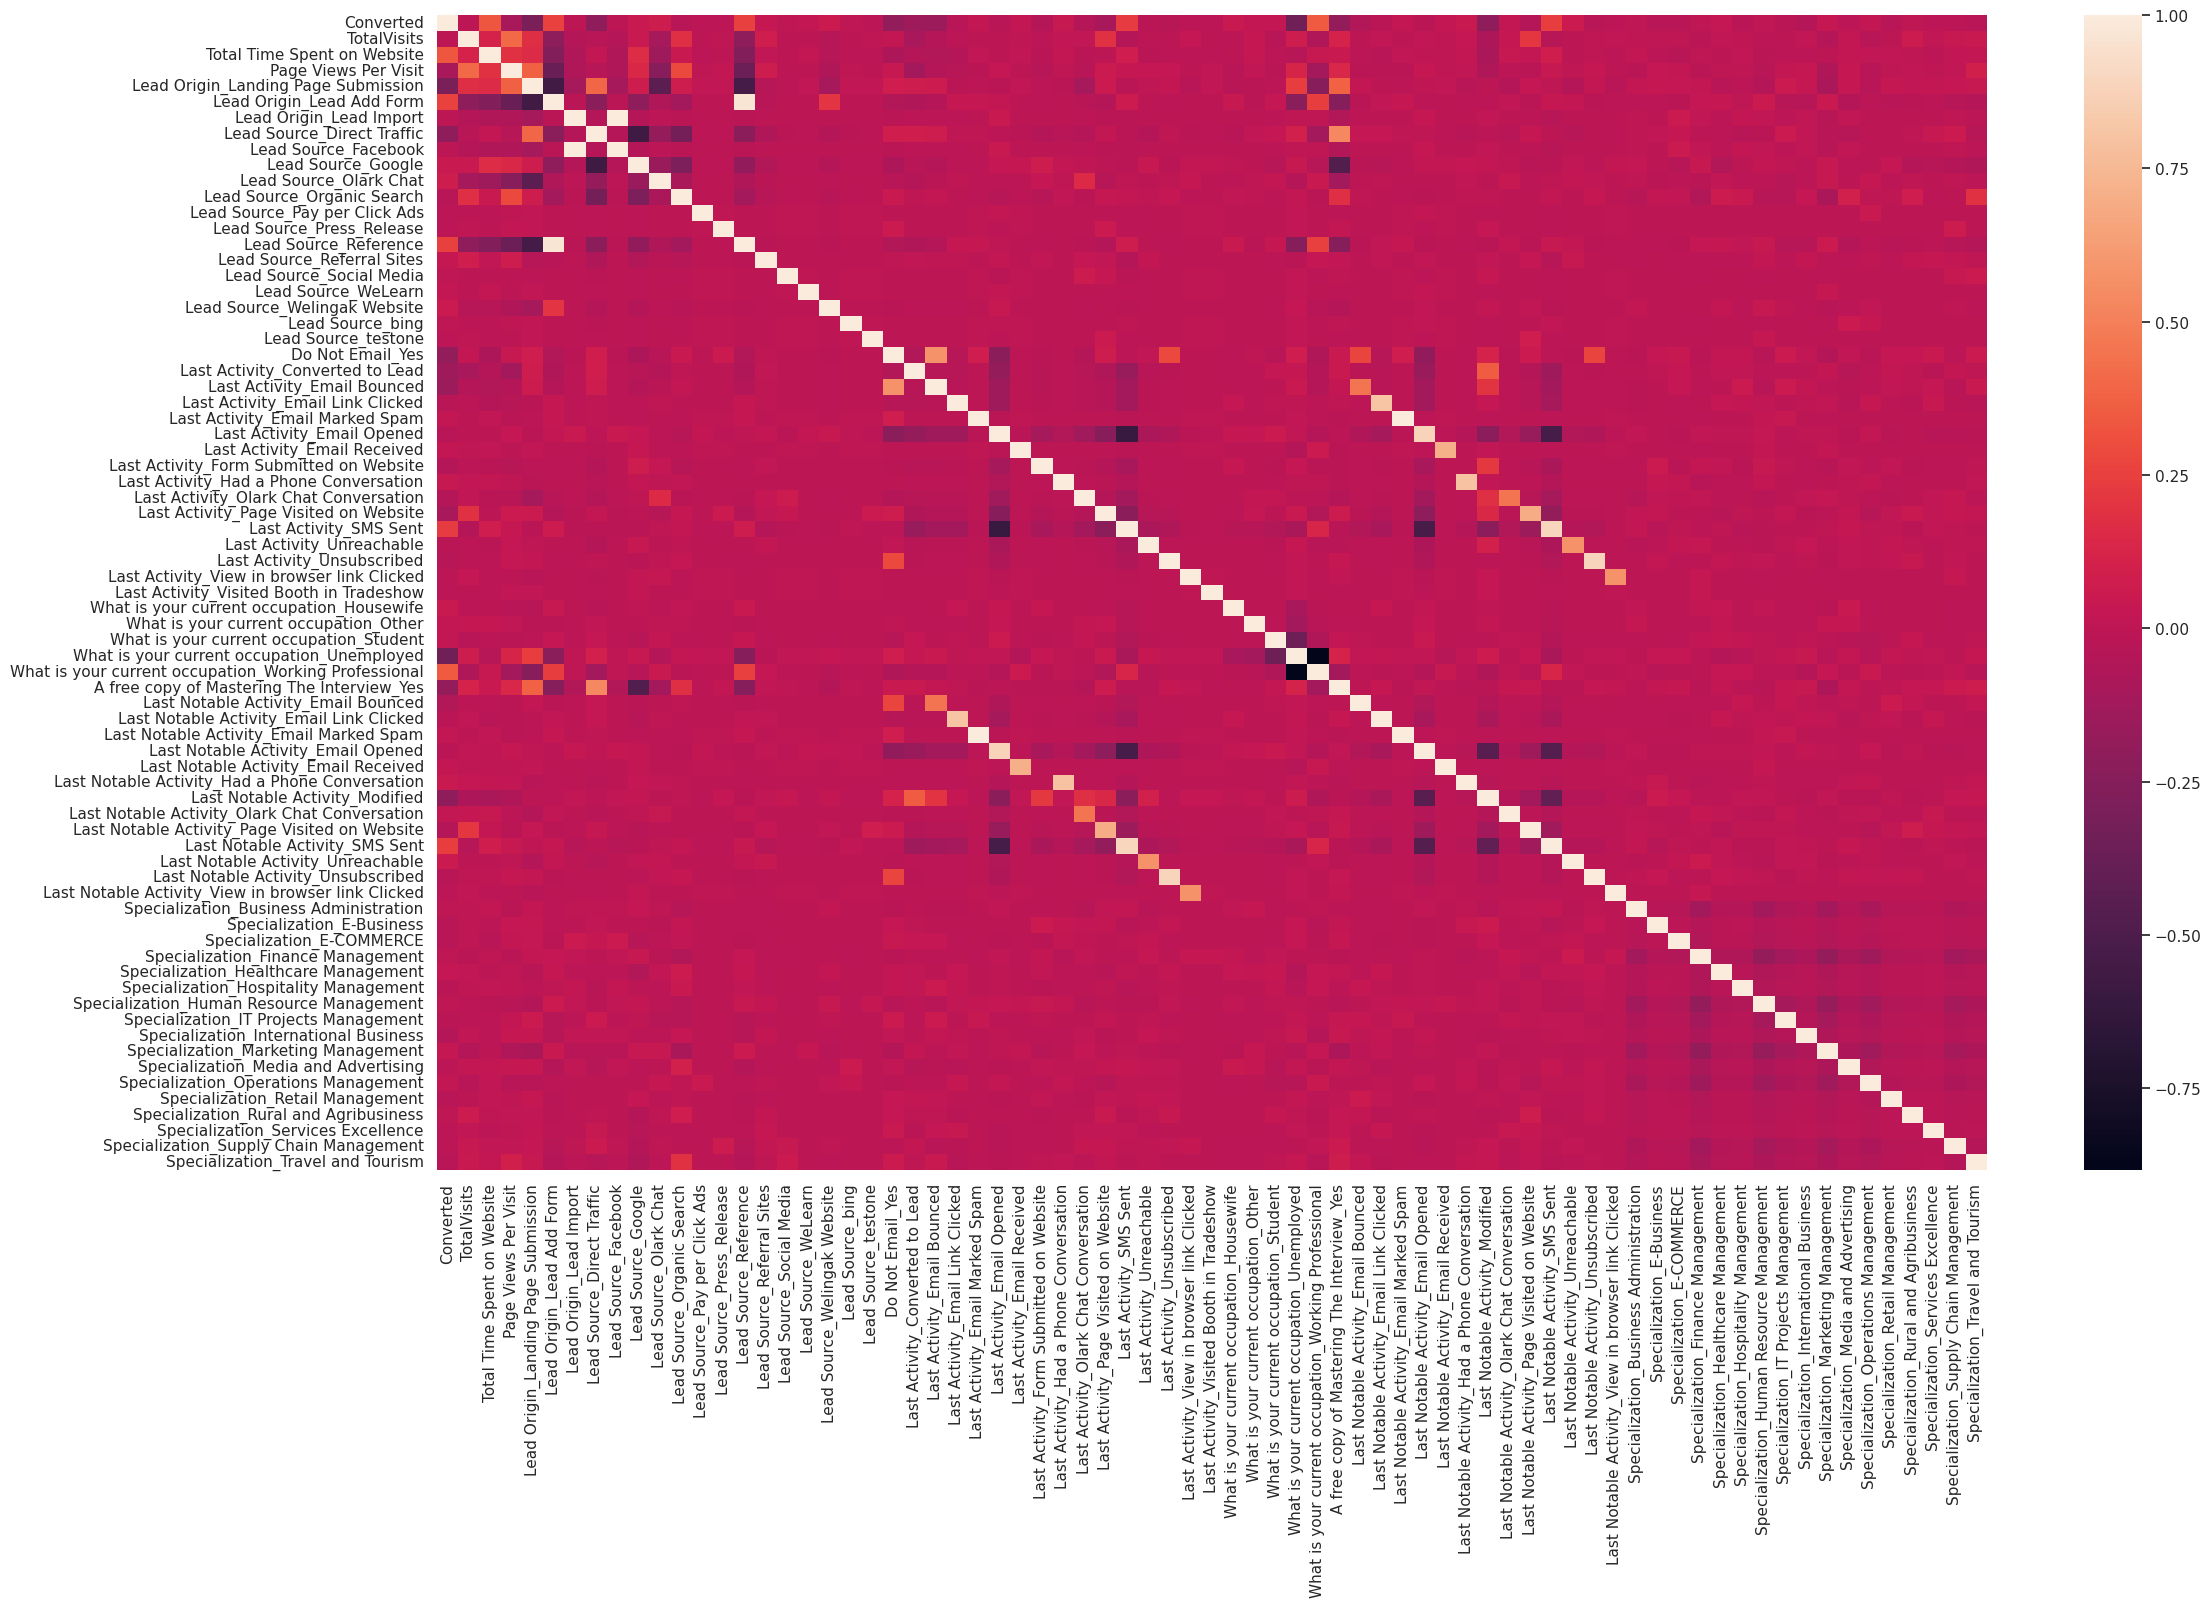

In [113]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(leads_model_ref.corr())
plt.show()

* Since the number of columns is very huge, and there is not easy mechanism to find out and remove un correlated one easily out
* we might need to turn back to RFe mechanism to remove columns


## Logistic Model Building

* We will take baby steps of removing columns using Rfe Technique

In [114]:
# Import RFE and initially selecting only 20 variables
logreg = LogisticRegression()

# for newer verison need to provide the parameter name `n_features_to_select`
rfe = RFE(logreg,n_features_to_select=20)
# rfe = RFE(logreg, 20) # use this code if you version of pyth on LogisticRegression is old

rfe = rfe.fit(X_train, y_train)

In [115]:
# Feature overview of all the columns

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 36),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', False, 17),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 27),
 ('Lead Source_Press_Release', False, 46),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Social Media', False, 31),
 ('Lead Source_WeLearn', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 35),
 ('Lead Source_testone', False, 25),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Mar

In [116]:
# Extracting only the rfe support identified columns

col = X_train.columns[rfe.support_]

* We have 20 features identified by Rfe
* Need to manually select the variable using the p-values and VIF's to fine tune the model

In [117]:
# override X_train with truncated columns

X_train = X_train[col]
X_train = X_train.astype(float)

### Removal of columns - round 1
* starting from here we will identify the most efficient feature for our model
* elimination of columns by identify high P-Value and VIF together

In [118]:
# Only stats modely has the ability to add constant so using the statsmodel library
# https://stackoverflow.com/questions/33833832/building-multi-regression-model-throws-error-pandas-data-cast-to-numpy-dtype-o
# need to convert the X_train to float else during Generalized Linear Models and fitting we will face errors

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3153
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1415.0
Date:                Tue, 19 Dec 2023   Deviance:                       2830.0
Time:                        17:30:13   Pearson chi2:                 3.87e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3900
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1353      0.279      0.485      0.628      -0.412       0.682
TotalVisits                                              8.7407      2.846      3.071      0.002       3.162      14.319
Total Time Spent on Website                              3.9704      0.195     20.368      0.000       3.588       4.352
Lead Origin_Landing Page Submission                     -1.2752      0.156     -8.150      0.000      -1.582      -0.969
Lead Origin_Lead Add Form                               -0.0409      1.234     -0.033      0.974      -2.460       2.378
Lead Source_Direct Traffic                              -0.3303      0.109     -3.039      0.002      -0.543      -0.117
Lead Source_Organic Search                              -0.3321      0.146     -2.280      0.023      -0.618      -0.047
Lead Source_Reference                                    2.7626      1.270      2.176      0.030       0.274       5.251
Lead Source_Welingak Website                            23.6820   2.52e+04      0.001      0.999   -4.94e+04    4.95e+04
Do Not Email_Yes                                        -1.4433      0.256     -5.631      0.000      -1.946      -0.941
Last Activity_Converted to Lead                         -1.2942      0.288     -4.491      0.000      -1.859      -0.729
Last Activity_Email Bounced                             -2.4557      1.069     -2.297      0.022      -4.551      -0.360
Last Activity_Had a Phone Conversation                   0.6562      1.276      0.514      0.607      -1.846       3.158
Last Activity_Olark Chat Conversation                   -0.9654      0.307     -3.142      0.002      -1.568      -0.363
Last Activity_SMS Sent                                   0.9928      0.101      9.789      0.000       0.794       1.192
What is your current occupation_Housewife               23.1580   2.73e+04      0.001      0.999   -5.35e+04    5.35e+04
What is your current occupation_Unemployed              -0.7875      0.248     -3.175      0.001      -1.274      -0.301
What is your current occupation_Working Professional     1.9432      0.320      6.072      0.000       1.316       2.570
Last Notable Activity_Email Bounced                      3.0234      1.225      2.469      0.014       0.623       5.424
Last Notable Activity_Had a Phone Conversation          22.7172   2.32e+04      0.001      0.999   -4.55e+04    4.55e+04
Last Notable Activity_Unreachable                        2.8477      1.124      2.534      0.011       0.646       5.050
========================================================================================================================
"""

* Ideally P value should not be greated than 0.05
* There are many field which has high p value like 
    * Lead Source_Welingak Website, 
    * what is your current occupation_Housewife
    * What is your current occupation_Unemployed
    * What is your current occupation_Working Professional
    * Last Notable Activity_Email Bounced
    * Last Notable Activity_Had a Phone Conversation
    * Last Notable Activity_Unreachable

In [119]:
# Imported 'variance_inflation_factor'
# Create a VIF dataframe for all the colums

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,77.64
6,Lead Source_Reference,74.18
2,Lead Origin_Landing Page Submission,7.38
15,What is your current occupation_Unemployed,7.23
7,Lead Source_Welingak Website,4.00
1,Total Time Spent on Website,2.38
4,Lead Source_Direct Traffic,2.32
18,Last Notable Activity_Had a Phone Conversation,2.18
11,Last Activity_Had a Phone Conversation,2.18
16,What is your current occupation_Working Profes...,2.10


* VIFs seem to be in a decent range except for three variables. 

* Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.

In [120]:
# columns removed from train data set
columns_removed_for_model = []

In [121]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [122]:
columns_removed_for_model.append('Lead Source_Reference')
columns_removed_for_model

['Lead Source_Reference']

### Removal of columns - round 2
* starting from here we will identify the most efficient feature for our model
* elimination of columns by identify high P-Value and VIF together

In [123]:
# Only stats modely has the ability to add constant so using the statsmodel library
# https://stackoverflow.com/questions/33833832/building-multi-regression-model-throws-error-pandas-data-cast-to-numpy-dtype-o
# need to convert the X_train to float else during Generalized Linear Models and fitting we will face errors

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3154
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1417.4
Date:                Tue, 19 Dec 2023   Deviance:                       2834.8
Time:                        17:30:13   Pearson chi2:                 3.78e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3890
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1396      0.279      0.501      0.616      -0.407       0.686
TotalVisits                                              8.7494      2.847      3.073      0.002       3.169      14.330
Total Time Spent on Website                              3.9719      0.195     20.372      0.000       3.590       4.354
Lead Origin_Landing Page Submission                     -1.2753      0.156     -8.149      0.000      -1.582      -0.969
Lead Origin_Lead Add Form                                2.5556      0.339      7.543      0.000       1.892       3.220
Lead Source_Direct Traffic                              -0.3305      0.109     -3.040      0.002      -0.544      -0.117
Lead Source_Organic Search                              -0.3325      0.146     -2.282      0.022      -0.618      -0.047
Lead Source_Welingak Website                            21.0871   2.52e+04      0.001      0.999   -4.94e+04    4.95e+04
Do Not Email_Yes                                        -1.4396      0.256     -5.628      0.000      -1.941      -0.938
Last Activity_Converted to Lead                         -1.2929      0.288     -4.486      0.000      -1.858      -0.728
Last Activity_Email Bounced                             -2.4578      1.069     -2.299      0.022      -4.554      -0.362
Last Activity_Had a Phone Conversation                   0.6741      1.269      0.531      0.595      -1.813       3.161
Last Activity_Olark Chat Conversation                   -0.9610      0.307     -3.131      0.002      -1.563      -0.359
Last Activity_SMS Sent                                   0.9970      0.101      9.839      0.000       0.798       1.196
What is your current occupation_Housewife               23.1587   2.73e+04      0.001      0.999   -5.36e+04    5.36e+04
What is your current occupation_Unemployed              -0.7945      0.247     -3.210      0.001      -1.280      -0.309
What is your current occupation_Working Professional     1.9406      0.320      6.072      0.000       1.314       2.567
Last Notable Activity_Email Bounced                      3.0233      1.225      2.468      0.014       0.623       5.424
Last Notable Activity_Had a Phone Conversation          22.7011   2.32e+04      0.001      0.999   -4.55e+04    4.55e+04
Last Notable Activity_Unreachable                        2.8535      1.123      2.541      0.011       0.653       5.054
========================================================================================================================
"""

In [124]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,7.38
14,What is your current occupation_Unemployed,7.22
1,Total Time Spent on Website,2.38
4,Lead Source_Direct Traffic,2.32
10,Last Activity_Had a Phone Conversation,2.18
17,Last Notable Activity_Had a Phone Conversation,2.18
15,What is your current occupation_Working Profes...,2.10
9,Last Activity_Email Bounced,1.88
7,Do Not Email_Yes,1.69
12,Last Activity_SMS Sent,1.69


* VIFs seem to be in a decent range except for three variables. 

* Let's first drop the variable `Lead Source_Reference` since it has a high p-value as well as a high VIF.

In [125]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

In [126]:
columns_removed_for_model.append('Lead Source_Welingak Website')
columns_removed_for_model

['Lead Source_Reference', 'Lead Source_Welingak Website']

### Removal of columns - round 3
* starting from here we will identify the most efficient feature for our model
* elimination of columns by identify high P-Value and VIF together

In [127]:
# Only stats modely has the ability to add constant so using the statsmodel library
# https://stackoverflow.com/questions/33833832/building-multi-regression-model-throws-error-pandas-data-cast-to-numpy-dtype-o
# need to convert the X_train to float else during Generalized Linear Models and fitting we will face errors

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3155
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1418.2
Date:                Tue, 19 Dec 2023   Deviance:                       2836.4
Time:                        17:30:14   Pearson chi2:                 3.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3887
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1374      0.279      0.493      0.622      -0.409       0.684
TotalVisits                                              8.7542      2.848      3.074      0.002       3.173      14.335
Total Time Spent on Website                              3.9723      0.195     20.375      0.000       3.590       4.354
Lead Origin_Landing Page Submission                     -1.2756      0.157     -8.151      0.000      -1.582      -0.969
Lead Origin_Lead Add Form                                2.6230      0.338      7.767      0.000       1.961       3.285
Lead Source_Direct Traffic                              -0.3304      0.109     -3.039      0.002      -0.544      -0.117
Lead Source_Organic Search                              -0.3325      0.146     -2.282      0.022      -0.618      -0.047
Do Not Email_Yes                                        -1.4416      0.256     -5.631      0.000      -1.943      -0.940
Last Activity_Converted to Lead                         -1.2929      0.288     -4.486      0.000      -1.858      -0.728
Last Activity_Email Bounced                             -2.4561      1.069     -2.297      0.022      -4.552      -0.360
Last Activity_Had a Phone Conversation                   0.6674      1.272      0.525      0.600      -1.826       3.161
Last Activity_Olark Chat Conversation                   -0.9625      0.307     -3.134      0.002      -1.564      -0.361
Last Activity_SMS Sent                                   0.9968      0.101      9.838      0.000       0.798       1.195
What is your current occupation_Housewife               23.1580   2.73e+04      0.001      0.999   -5.35e+04    5.36e+04
What is your current occupation_Unemployed              -0.7919      0.248     -3.197      0.001      -1.277      -0.306
What is your current occupation_Working Professional     1.9415      0.320      6.071      0.000       1.315       2.568
Last Notable Activity_Email Bounced                      3.0235      1.225      2.469      0.014       0.623       5.424
Last Notable Activity_Had a Phone Conversation          22.7079   2.32e+04      0.001      0.999   -4.55e+04    4.55e+04
Last Notable Activity_Unreachable                        2.8518      1.123      2.539      0.011       0.650       5.053
========================================================================================================================
"""

In [128]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,7.38
13,What is your current occupation_Unemployed,7.22
1,Total Time Spent on Website,2.38
4,Lead Source_Direct Traffic,2.32
9,Last Activity_Had a Phone Conversation,2.18
16,Last Notable Activity_Had a Phone Conversation,2.18
14,What is your current occupation_Working Profes...,2.10
8,Last Activity_Email Bounced,1.88
11,Last Activity_SMS Sent,1.69
6,Do Not Email_Yes,1.69


* VIFs seem to be in a decent range except for three variables. 

* Let's first drop the variable `What is your current occupation_Housewife` since it has a high p-value as well as a high VIF.

In [129]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [130]:
columns_removed_for_model.append('What is your current occupation_Housewife')
columns_removed_for_model

['Lead Source_Reference',
 'Lead Source_Welingak Website',
 'What is your current occupation_Housewife']

### Removal of columns - round 4
* starting from here we will identify the most efficient feature for our model
* elimination of columns by identify high P-Value and VIF together

In [131]:
# Only stats modely has the ability to add constant so using the statsmodel library
# https://stackoverflow.com/questions/33833832/building-multi-regression-model-throws-error-pandas-data-cast-to-numpy-dtype-o
# need to convert the X_train to float else during Generalized Linear Models and fitting we will face errors

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3156
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1421.1
Date:                Tue, 19 Dec 2023   Deviance:                       2842.1
Time:                        17:30:14   Pearson chi2:                 3.83e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3876
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2444      0.274      0.891      0.373      -0.293       0.782
TotalVisits                                              8.5750      2.831      3.029      0.002       3.026      14.124
Total Time Spent on Website                              3.9693      0.195     20.383      0.000       3.588       4.351
Lead Origin_Landing Page Submission                     -1.2695      0.156     -8.121      0.000      -1.576      -0.963
Lead Origin_Lead Add Form                                2.6231      0.338      7.769      0.000       1.961       3.285
Lead Source_Direct Traffic                              -0.3338      0.109     -3.073      0.002      -0.547      -0.121
Lead Source_Organic Search                              -0.3212      0.145     -2.210      0.027      -0.606      -0.036
Do Not Email_Yes                                        -1.4429      0.256     -5.639      0.000      -1.944      -0.941
Last Activity_Converted to Lead                         -1.3016      0.288     -4.518      0.000      -1.866      -0.737
Last Activity_Email Bounced                             -2.4791      1.072     -2.313      0.021      -4.579      -0.379
Last Activity_Had a Phone Conversation                   0.6573      1.271      0.517      0.605      -1.834       3.149
Last Activity_Olark Chat Conversation                   -0.9697      0.307     -3.156      0.002      -1.572      -0.367
Last Activity_SMS Sent                                   0.9928      0.101      9.800      0.000       0.794       1.191
What is your current occupation_Unemployed              -0.8983      0.243     -3.701      0.000      -1.374      -0.423
What is your current occupation_Working Professional     1.8352      0.316      5.809      0.000       1.216       2.454
Last Notable Activity_Email Bounced                      3.0408      1.227      2.478      0.013       0.636       5.446
Last Notable Activity_Had a Phone Conversation          21.7187   1.41e+04      0.002      0.999   -2.76e+04    2.76e+04
Last Notable Activity_Unreachable                        2.8490      1.123      2.536      0.011       0.647       5.051
========================================================================================================================
"""

In [132]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,7.34
12,What is your current occupation_Unemployed,7.15
1,Total Time Spent on Website,2.37
4,Lead Source_Direct Traffic,2.32
15,Last Notable Activity_Had a Phone Conversation,2.18
9,Last Activity_Had a Phone Conversation,2.18
13,What is your current occupation_Working Profes...,2.08
8,Last Activity_Email Bounced,1.88
11,Last Activity_SMS Sent,1.69
6,Do Not Email_Yes,1.69


* Let's first drop the variable `Last Notable Activity_Had a Phone Conversation` since it has a high p-value as well as a high STD-err.

In [133]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [134]:
columns_removed_for_model.append('Last Notable Activity_Had a Phone Conversation')
columns_removed_for_model

['Lead Source_Reference',
 'Lead Source_Welingak Website',
 'What is your current occupation_Housewife',
 'Last Notable Activity_Had a Phone Conversation']

### Removal of columns - round 5
* starting from here we will identify the most efficient feature for our model
* elimination of columns by identify high P-Value and VIF together

In [135]:
# Only stats modely has the ability to add constant so using the statsmodel library
# https://stackoverflow.com/questions/33833832/building-multi-regression-model-throws-error-pandas-data-cast-to-numpy-dtype-o
# need to convert the X_train to float else during Generalized Linear Models and fitting we will face errors

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3157
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1422.7
Date:                Tue, 19 Dec 2023   Deviance:                       2845.3
Time:                        17:30:14   Pearson chi2:                 3.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3870
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2481      0.274      0.905      0.366      -0.289       0.786
TotalVisits                                              8.7604      2.841      3.084      0.002       3.192      14.328
Total Time Spent on Website                              3.9661      0.195     20.372      0.000       3.585       4.348
Lead Origin_Landing Page Submission                     -1.2743      0.156     -8.170      0.000      -1.580      -0.969
Lead Origin_Lead Add Form                                2.6149      0.338      7.745      0.000       1.953       3.277
Lead Source_Direct Traffic                              -0.3342      0.108     -3.081      0.002      -0.547      -0.122
Lead Source_Organic Search                              -0.3325      0.145     -2.288      0.022      -0.617      -0.048
Do Not Email_Yes                                        -1.4567      0.256     -5.700      0.000      -1.958      -0.956
Last Activity_Converted to Lead                         -1.2990      0.288     -4.510      0.000      -1.863      -0.735
Last Activity_Email Bounced                             -2.4687      1.072     -2.303      0.021      -4.570      -0.368
Last Activity_Had a Phone Conversation                   2.1374      0.935      2.286      0.022       0.305       3.970
Last Activity_Olark Chat Conversation                   -0.9723      0.307     -3.164      0.002      -1.575      -0.370
Last Activity_SMS Sent                                   0.9940      0.101      9.811      0.000       0.795       1.193
What is your current occupation_Unemployed              -0.8981      0.243     -3.700      0.000      -1.374      -0.422
What is your current occupation_Working Professional     1.8325      0.316      5.800      0.000       1.213       2.452
Last Notable Activity_Email Bounced                      3.0439      1.228      2.480      0.013       0.638       5.450
Last Notable Activity_Unreachable                        2.8491      1.123      2.536      0.011       0.647       5.051
========================================================================================================================
"""

In [136]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,7.32
12,What is your current occupation_Unemployed,7.14
1,Total Time Spent on Website,2.37
4,Lead Source_Direct Traffic,2.32
13,What is your current occupation_Working Profes...,2.08
8,Last Activity_Email Bounced,1.87
6,Do Not Email_Yes,1.69
11,Last Activity_SMS Sent,1.69
0,TotalVisits,1.64
3,Lead Origin_Lead Add Form,1.51


* we have two value with High VIF 'Lead Origin_Landing Page Submission' and 'What is your current occupation_Unemployed' and almost same

* both are negatively correlated

* Looking from a business perspective its better have `What is your current occupation_Unemployed` as there is potential possibility for unemployed to join a courese

* Let's first drop the variable `Lead Origin_Landing Page Submission` since it has a VIF > 5.

In [137]:
X_train.drop('Lead Origin_Landing Page Submission', axis = 1, inplace = True)

In [138]:
columns_removed_for_model.append('Lead Origin_Landing Page Submission')
columns_removed_for_model

['Lead Source_Reference',
 'Lead Source_Welingak Website',
 'What is your current occupation_Housewife',
 'Last Notable Activity_Had a Phone Conversation',
 'Lead Origin_Landing Page Submission']

### Removal of columns - round 6
* starting from here we will identify the most efficient feature for our model
* elimination of columns by identify high P-Value and VIF together

In [139]:
# Only stats modely has the ability to add constant so using the statsmodel library
# https://stackoverflow.com/questions/33833832/building-multi-regression-model-throws-error-pandas-data-cast-to-numpy-dtype-o
# need to convert the X_train to float else during Generalized Linear Models and fitting we will face errors

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3174
Model:                            GLM   Df Residuals:                     3158
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1458.2
Date:                Tue, 19 Dec 2023   Deviance:                       2916.4
Time:                        17:30:14   Pearson chi2:                 3.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3731
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5840      0.252     -2.319      0.020      -1.078      -0.090
TotalVisits                                              5.6815      2.518      2.257      0.024       0.747      10.616
Total Time Spent on Website                              3.7950      0.189     20.039      0.000       3.424       4.166
Lead Origin_Lead Add Form                                3.4664      0.321     10.799      0.000       2.837       4.096
Lead Source_Direct Traffic                              -0.6326      0.101     -6.247      0.000      -0.831      -0.434
Lead Source_Organic Search                              -0.4664      0.141     -3.310      0.001      -0.742      -0.190
Do Not Email_Yes                                        -1.4014      0.249     -5.631      0.000      -1.889      -0.914
Last Activity_Converted to Lead                         -1.2994      0.283     -4.588      0.000      -1.854      -0.744
Last Activity_Email Bounced                             -2.5837      1.078     -2.397      0.017      -4.696      -0.471
Last Activity_Had a Phone Conversation                   2.1722      0.899      2.415      0.016       0.409       3.935
Last Activity_Olark Chat Conversation                   -0.5726      0.295     -1.942      0.052      -1.151       0.005
Last Activity_SMS Sent                                   0.9650      0.100      9.662      0.000       0.769       1.161
What is your current occupation_Unemployed              -0.9248      0.240     -3.847      0.000      -1.396      -0.454
What is your current occupation_Working Professional     1.9223      0.314      6.122      0.000       1.307       2.538
Last Notable Activity_Email Bounced                      3.2106      1.225      2.621      0.009       0.809       5.612
Last Notable Activity_Unreachable                        2.8174      1.113      2.532      0.011       0.637       4.998
========================================================================================================================
"""

In [140]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.18
1,Total Time Spent on Website,2.33
3,Lead Source_Direct Traffic,1.97
7,Last Activity_Email Bounced,1.87
12,What is your current occupation_Working Profes...,1.75
5,Do Not Email_Yes,1.69
10,Last Activity_SMS Sent,1.69
0,TotalVisits,1.62
4,Lead Source_Organic Search,1.38
2,Lead Origin_Lead Add Form,1.31


* We have all the VIF under <5
* We have all the P value less than 0.05 except `Last Activity_Olark Chat Conversation` which on the border
* our current feature set is good enough for now, let see the evaluation and other model metrics to remove further

## Model Prediction and  Evaluation

In [141]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

2006   0.14
5140   0.12
7588   0.26
5244   0.32
8663   0.09
734    0.07
4481   0.88
971    0.47
5106   0.22
869    0.21
dtype: float64

In [142]:
y_train_pred.shape

(3174,)

In [143]:
# Converting to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14446054, 0.12488126, 0.26257212, 0.31856352, 0.08912843,
       0.06575934, 0.87626827, 0.46769074, 0.21711112, 0.20922046])

### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [144]:
# Creating a new data to compare Actual_Y vs Predicted_Y_Proability

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.14
1,0,0.12
2,1,0.26
3,0,0.32
4,0,0.09


### Calculate 'Predicted' or 'Potential to be converted' with 1 if Predicted_Y_Proability > 0.5 else 0
* since this is not a medical or any critical proces, we can have the any lead probability greater than 0.5 as higher probability

In [145]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.14,0
1,0,0.12,0
2,1,0.26,0
3,0,0.32,0
4,0,0.09,0


## Modely Evaluation

### Confusion Matrics for comparison

In [146]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1277,  276],
       [ 373, 1248]])

In [147]:
# Predicted     not_churn    churn
# Actual
# not_churn        1277      276
# churn            373       1248  

### Accuracy

In [148]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.795526149968494


### Model accuracy attribute calculation

In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Sensitivity Calculation

In [150]:
TP/(TP+FN)

0.769895126465145

### Specificity Calculation

In [151]:
TN/(TN+FP)

0.8222794591113973

### Optimal Cutoff Derivation



In [152]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [153]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [154]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

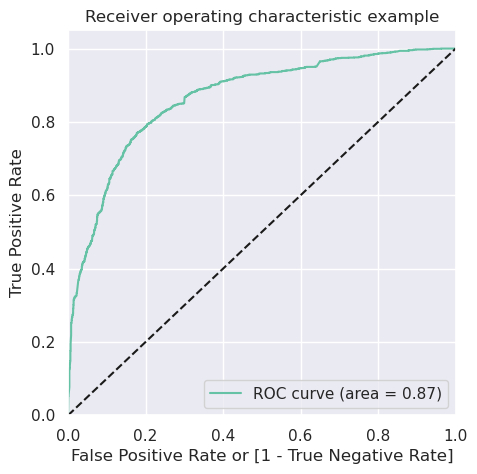

In [155]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

* Area under curve or RoC is `0.87` - very good optimal value

### Derivation of the optimal cutoff point.


In [156]:
numbers = [x/100 for x in range(0, 101, 5)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0
0,0,0.14,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.12,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.26,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.32,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.09,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [x/100 for x in range(0, 101, 5)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df.head()

,prob,accuracy,sensi,speci
0.00,0.00,0.51,1.00,0.00
0.05,0.05,0.55,1.00,0.08
0.10,0.10,0.57,0.99,0.14
0.15,0.15,0.63,0.98,0.27
0.20,0.20,0.68,0.95,0.40


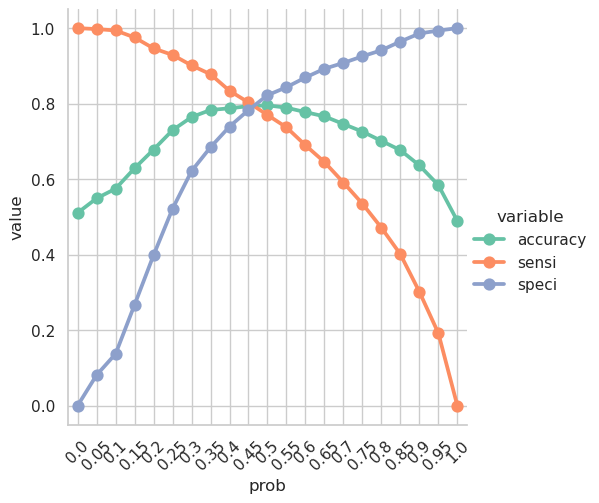

In [158]:
sns.set_style("whitegrid")
dfm = cutoff_df.melt('prob', var_name='variable', value_name='value')
g = sns.catplot(x="prob", y="value", hue='variable', data=dfm, kind='point')
x_ticks_val = [x/100 for x in range(0, 101, 5)]
plt.grid(axis="x")
plt.xticks(rotation=45) 
# g.set_xlabels(rotation=45)
plt.show()

* As you can see that around 0.46 ( approximately), you get the optimal values of the three metrics. So let's choose 0.46 as our cutoff now.

In [159]:
cutoff = 0.46

In [160]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > cutoff else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0,final_predicted
0,0,0.14,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.12,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.26,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.32,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.09,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Updated accuracy now

In [161]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7939508506616257

### Updated Confusion matrix

In [162]:
confusion_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_final

array([[1231,  322],
       [ 332, 1289]])

### Updated Model accuracy attribute calculation

In [163]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

### Updated Sensitivity Calculation

In [164]:
TP/(TP+FN)

0.7951881554595929

### Updated Specificity Calculation

In [165]:
TN/(TN+FP)

0.7926593689632968

This cutoff point is 80 which is good cut off point

## Calculating Predictions on Test Data Set

In [166]:
columns_removed_for_model

['Lead Source_Reference',
 'Lead Source_Welingak Website',
 'What is your current occupation_Housewife',
 'Last Notable Activity_Had a Phone Conversation',
 'Lead Origin_Landing Page Submission']

In [167]:
# Numerical columns of test data set needs to be Scaled similar to the Train data set

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [168]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8536,0.01,0.02,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False
945,0.01,0.19,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
1550,0.00,0.00,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
8570,0.02,0.11,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1410,0.02,0.14,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [169]:
# create X_test along with stats model constant similar to train

X_test_sm = sm.add_constant(X_test[col])

In [170]:
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,...,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
8536,1.00,0.01,0.02,True,False,True,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
945,1.00,0.01,0.19,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1550,1.00,0.00,0.00,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
8570,1.00,0.02,0.11,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1410,1.00,0.02,0.14,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [171]:
# Drop the required columns from X_test as well

X_test.drop(columns_removed_for_model, axis=1, inplace = True)

### Calculating 'y_test_pred'

In [172]:
y_test_pred = res.predict(sm.add_constant(X_test).astype(float))

In [173]:
y_test_pred[:10]

8536   0.25
945    0.12
1550   0.88
8570   0.99
1410   0.21
5664   0.92
5232   0.04
6744   0.32
6924   0.28
3878   0.21
dtype: float64

In [174]:
# Converting y_pred to a dataframe

y_pred_initial = pd.DataFrame(y_test_pred)

In [175]:
# Let's see the head

y_pred_initial.head()

,0
8536,0.25
945,0.12
1550,0.88
8570,0.99
1410,0.21


In [176]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [177]:
# Remove index for both dataframes to append them side by side 

y_pred_initial.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [178]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_initial],axis=1)

In [179]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.25
1,0,0.12
2,1,0.88
3,1,0.99
4,0,0.21


In [180]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [181]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.25
1,0,0.12
2,1,0.88
3,1,0.99
4,0,0.21


In [182]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > cutoff else 0)

In [183]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.25,0
1,0,0.12,0
2,1,0.88,1
3,1,0.99,1
4,0,0.21,0


In [184]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7817781043350478

In [185]:
confusion_pred_final = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_pred_final

array([[516, 150],
       [147, 548]])

In [186]:
TP = confusion_pred_final[1,1] # true positive 
TN = confusion_pred_final[0,0] # true negatives
FP = confusion_pred_final[0,1] # false positives
FN = confusion_pred_final[1,0] # false negatives

### Calculate predicted sensitivity

In [187]:
TP / (TP+FN)

0.7884892086330936

### Calculate predicted specificity

In [188]:
TN / (TN+FP)

0.7747747747747747

This cutoff point of 0.46 is optimal considering
* Accuracy: 78
* Sensitivity: 79
* Specificity: 77

## Building Precision-Recall View
* building the model using the Recall View

In [189]:
confusion_recall = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion_recall

array([[1277,  276],
       [ 373, 1248]])

##### Precision for Recall
TP / TP + FP

In [190]:
confusion_recall[1,1]/(confusion_recall[0,1]+confusion_recall[1,1])

0.8188976377952756

##### Recall
TP / TP + FN

In [191]:
confusion_recall[1,1]/(confusion_recall[1,0]+confusion_recall[1,1])

0.769895126465145

### Precision and recall tradeoff calculation

In [192]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 3169    1
 3170    0
 3171    1
 3172    1
 3173    1
 Name: Converted, Length: 3174, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3169    0
 3170    1
 3171    1
 3172    1
 3173    1
 Name: Predicted, Length: 3174, dtype: int64)

In [193]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

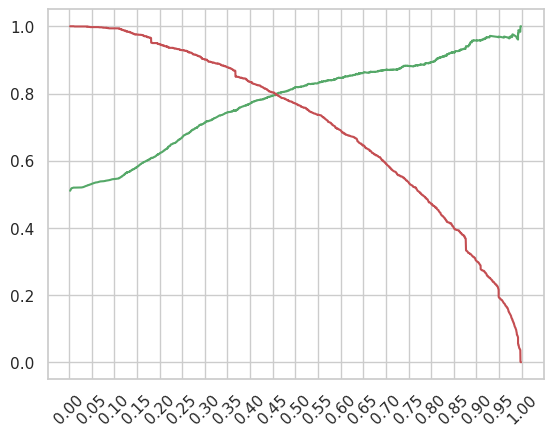

In [194]:
ax = plt.gca()
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
x_ticks_val = [x/100 for x in range(0, 101, 5)]

plt.xticks(rotation=45) 
plt.xticks(x_ticks_val) 
ax.grid(True)
plt.show()

In [195]:
recall_cutoff = 0.45

In [196]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0,final_predicted
0,0,0.14,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.12,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.26,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.32,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.09,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > recall_cutoff else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.05,0.1,0.15,0.2,0.25,0.3,...,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0,final_predicted
0,0,0.14,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.12,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.26,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.32,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0.09,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7933207309388783

In [199]:
confusion_pred_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_pred_final

array([[1216,  337],
       [ 319, 1302]])

In [201]:
# Accuracy metrics as well for pred_final

TP = confusion_pred_final[1,1] # true positive 
TN = confusion_pred_final[0,0] # true negatives
FP = confusion_pred_final[0,1] # false positives
FN = confusion_pred_final[1,0] # false negatives

### Calculate predicted sensitivity

In [202]:
TP / (TP+FN)


0.8032078963602715

### Calculate predicted specificity

In [203]:
TN / (TN+FP)

0.7830006439150032

### Calculate Precision

In [204]:
TP/(TP+FP)

0.7943868212324589

### Calculate Recall

In [205]:
TP/(TP+FN)

0.8032078963602715

## Recal Model Predictions on the Test Set

In [206]:
X_test = X_test.astype(float)

y_test_pred = res.predict(sm.add_constant(X_test))

In [207]:
y_test_pred[:10]

8536   0.25
945    0.12
1550   0.88
8570   0.99
1410   0.21
5664   0.92
5232   0.04
6744   0.32
6924   0.28
3878   0.21
dtype: float64

In [208]:
# Converting y_pred to a dataframe

y_pred_initial = pd.DataFrame(y_test_pred)

In [209]:
y_pred_initial.head()

,0
8536,0.25
945,0.12
1550,0.88
8570,0.99
1410,0.21


In [210]:
y_test_df = pd.DataFrame(y_test)
y_test_df

,Converted
8536,0
945,0
1550,1
8570,1
1410,0
...,...
2718,0
8201,0
7328,1
283,0


In [211]:
# compare y_pred_recall vs y_pred_test

y_pred_initial.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_initial],axis=1)

In [212]:

y_pred_final.head()

,Converted,0
0,0,0.25
1,0,0.12
2,1,0.88
3,1,0.99
4,0,0.21


In [213]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [214]:
y_pred_final

,Converted,Conversion_Prob
0,0,0.25
1,0,0.12
2,1,0.88
3,1,0.99
4,0,0.21
...,...,...
1356,0,0.32
1357,0,0.54
1358,1,0.35
1359,0,0.29


In [215]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.25
1,0,0.12
2,1,0.88
3,1,0.99
4,0,0.21


In [216]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > recall_cutoff else 0)

In [217]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.25,0
1,0,0.12,0
2,1,0.88,1
3,1,0.99,1
4,0,0.21,0


In [218]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7847171197648788

In [219]:
confusion_recall_final = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion_recall_final

array([[514, 152],
       [141, 554]])

In [220]:
TP = confusion_recall_final[1,1] # true positive 
TN = confusion_recall_final[0,0] # true negatives
FP = confusion_recall_final[0,1] # false positives
FN = confusion_recall_final[1,0] # false negatives

### Calculate predicted sensitivity

In [221]:
TP / (TP+FN)


0.7971223021582734

### Calculate predicted specificity

In [222]:
TN / (TN+FP)

0.7717717717717718

### Updated Calculate Precision using recall cutoff

In [223]:
TP/(TP+FP)

0.7847025495750708

### Updated recall using recall cutoff

In [224]:
TP/(TP+FN)

0.7971223021582734

This recall cutoff point of 0.4 is optimal considering
* Accuracy: 78 ( No major difference between Initial model and recall )
* Sensitivity: 79 ( No major difference between Initial model and recall )
* Specificity: 77 ( No major difference between Initial model and recall )

## Summary

# Problem Statement:
X Education sells online courses to the industry professionals. X Education needs help in selecting the most promising leads i.e, the leads that are mostly likely to convert into the paying customers.
The company needs a model wherein a lead score is assigned to each of the leads such that the customers with the higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

# Solution Approach and Summary:
## 1.Cleaning Data: 
The data was partially clean except  for a few null values and the select had to be replaced with a null value since it did not give us much information. Few of the null values were changed so that much of the data has not been lost. Although they were later removed while making dummies. Since there were many from India and few from outside India, the elements were changed to ‘India’.

## 2.EDA:
A quick EDA has done to check the condition of the data. It was found that a lot of elements in the categorical variables were irrelevant. The numeric values seems good and no outliers found.

## 3.Dummy Variables:
The dummy variables were created and later on the dummies with not provided elements were  removed. For numeric values we used the MinMaxScaler.

## 4.Train-Test split:
The split was done at 70% and 30% for train and test data respectively.

## 5.Model Building:
Firstly, RFE was done to attain the top 20 relevant variables. Later the rest of the variables were removed manually depending on the VIF values and the p-value(the variables with VIF< 5 and p-value<0.05 were kept).
* factors considered 
    * p-value<0.05
    * VIF < 5
    * Business Knowledge

## 6.Model Evaluation:
A confusion matrix was made. Later on the optimum cut off value (using ROC curve) was used to the find the accuracy, sensitivity and specificity.

## 7.Prediction:
Prediction was done on the test data frame and with an optimum cut off as 0.46 with below accuracy, sensitivity and specificity.
Accuracy: 0.78
sensitivity: 0.79
Specitivity: 0.78

## 8.Precision- Recall:
This method was also used to recheck and a cut off of 0.45 with below accuracy, sensitivity and specificity.
* Accuracy: 78 ( No major difference between Initial model and recall )
* Sensitivity: 79 ( No major difference between Initial model and recall )
* Specificity: 77 ( No major difference between Initial model and recall )

# Final logistic model calibrated with recall cut-off values
* Accuracy: 78
* Sensitivity: 79
* Specificity: 77

# End of program

In [225]:
# #checkpoint
# checkpoint - Last

# Misc

In [226]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system names
        if name == "PIL":
            name = "Pillow"
        elif name == "sklearn":
            name = "scikit-learn"

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

matplotlib==3.8.0
numpy==1.22.4
pandas==2.1.1
scikit-learn==1.3.2
seaborn==0.13.0
statsmodels==0.14.0
